# Predicting Critical Temperature of Superconductors using Multiple Linear Regression

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [43]:
dataset = pd.read_csv('train.csv')
dataset.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='critical_temp', ylabel='Density'>

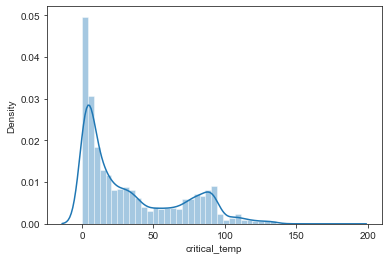

In [44]:
sns.distplot(dataset.critical_temp)

<AxesSubplot:>

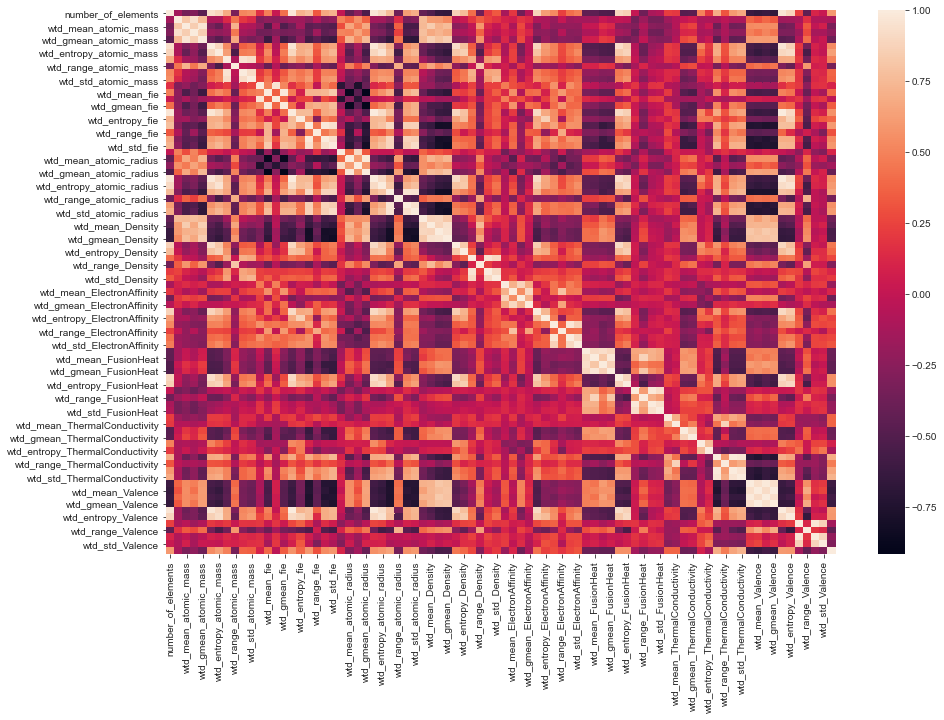

In [45]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.heatmap(dataset.corr(), ax=ax)

In [56]:
selected_columns = selected_columns[:, -1].values  # Removing the temperature column

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_entropy_fie,range_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,0.881845,0.682777,-0.320293,0.167451,0.484445,0.719209,0.781227,...,-0.469206,0.501871,0.207065,0.696060,0.316772,-0.609412,0.231874,-0.447770,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,-0.097609,0.125659,0.446225,-0.285782,-0.222097,-0.163565,-0.255628,...,0.056394,-0.100077,-0.098221,-0.114538,-0.027790,0.374099,-0.107450,0.168633,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,-0.412666,-0.144029,0.716623,-0.209296,-0.522595,-0.129779,-0.452303,...,0.250226,-0.076936,0.025638,-0.376573,-0.108512,0.534450,-0.039155,0.330904,0.077323,-0.312272
wtd_entropy_atomic_mass,0.881845,-0.097609,-0.412666,1.000000,0.624432,-0.543305,0.126955,0.531431,0.698922,0.744625,...,-0.505488,0.381716,0.182082,0.688968,0.302974,-0.583784,0.161350,-0.546910,-0.006937,0.626930
range_atomic_mass,0.682777,0.125659,-0.144029,0.624432,1.000000,-0.109804,0.209722,0.438776,0.542903,0.647444,...,-0.335446,0.234582,0.122015,0.548168,0.252743,-0.435907,0.208861,-0.365395,0.102634,0.491970


In [47]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[[ 4.   88.94 57.86 ...  1.    1.09  0.44]
 [ 5.   92.73 58.52 ...  2.    1.13  0.47]
 [ 4.   88.94 57.89 ...  1.    1.11  0.44]
 ...
 [ 2.   99.66 95.61 ...  1.    3.2   0.4 ]
 [ 2.   99.66 97.1  ...  1.    2.21  0.46]
 [ 3.   87.47 86.86 ...  3.    1.8   1.5 ]]


## Splitting the dataset into the Training set and Test set

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Features Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Feature selection using the Mutual Information metric
The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the mutual_info_regression() function.

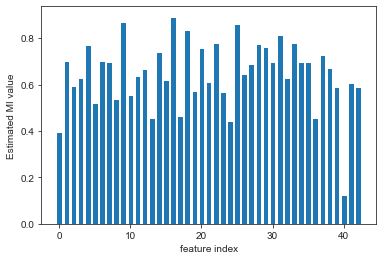

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

## Training the Multiple Linear Regression model on the Training set

In [93]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_fs, y_train)

LinearRegression()

## Predicting the Test set results

In [94]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[80.36 85.  ]
 [64.63 85.5 ]
 [17.44 11.6 ]
 ...
 [19.8  51.  ]
 [-6.76 60.  ]
 [74.49 79.  ]]


Text(0, 0.5, 'Predicted Critical Temperature (K)')

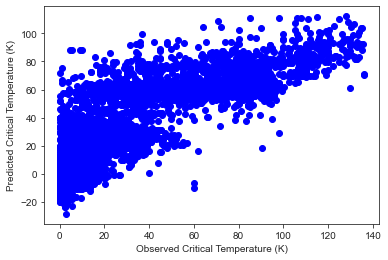

In [95]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

In [96]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

359.2865489041564

In [97]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

18.954855549546043

In [98]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.31 %
Standard Deviation: 1.35 %
